# Ring Model with LOCM Perturbation Kernel


In [16]:
import os
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

from abcsmc.abcsmc import abcsmc
from abcsmc.models import RingModel
from abcsmc.priors import UniformPrior
from abcsmc.plotting import plot_results
from abcsmc.plotting import plot_perturbation_sample
from abcsmc.plotting import plot_all_perturbation_sample


In [17]:
imgdir = "../out/images/nb_ring_locm"
os.makedirs(imgdir, exist_ok=True)

### Generate observed data $X_0$


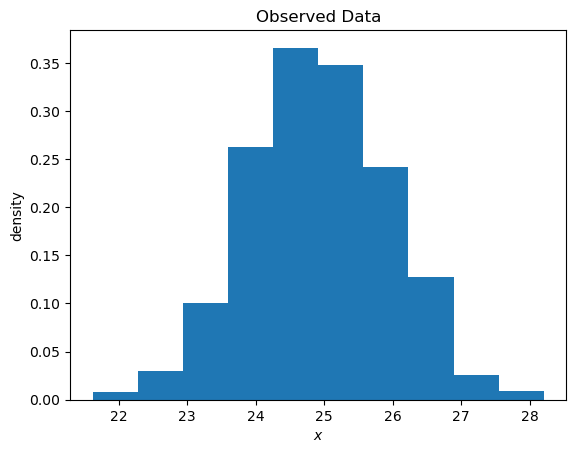

In [18]:
# True model parameters
theta1 = 3
theta2 = 4
var_const = 1
true_params = [theta1, theta2]

# True model and generated "observed" data
model = RingModel(theta1, theta2, var_const)
data = model.generate_data(1000)

# Parameter indices and names used for plotting
pidx1 = 0
pidx2 = 1
pname1 = "$\\theta_1$"
pname2 = "$\\theta_2$"

plt.hist(data, density=True)
plt.title("Observed Data")
plt.xlabel('$x$');
plt.ylabel("density");

### Define priors


In [19]:
# Priors
prior_theta1 = UniformPrior(-20, 20)
prior_theta2 = UniformPrior(-20, 20)

prior_list = [prior_theta1, prior_theta2]

### Compute summary statistics of the observed data and define a distance function


In [20]:
# Summary statistics of the observed data
data_mu = np.mean(data)
data_var = np.var(data)

# Distance function
def f_dist(x):
    mu_err = np.abs(np.mean(x) - data_mu) / data_mu
    var_err = np.abs(np.var(x) - data_var) / data_var
    return mu_err + var_err

### Define a simulation function

In [21]:
# Simulation function
def f_sim(particle, n=100):
    return RingModel(particle[0], particle[1], var_const).generate_data(n)

## Run ABC-SMC

In [22]:
KERNEL_METHOD = 'locm'
NPARTICLES = 1000
NITERS = 5

EPS0 = 5
EPS_PERCENTILE = 0.15

particles, weights, results_dict = abcsmc(
    nparticles=NPARTICLES, 
    nparams=2, 
    prior_list=prior_list, 
    niters=NITERS,
    sim_func=f_sim,
    dist_func=f_dist, 
    eps0=EPS0, 
    eps_percentile=EPS_PERCENTILE, 
    min_eps=0, 
    kernel_method=KERNEL_METHOD,
    track_all_perturbations = True,
)


Running ABC-SMC...


Iteration:   0%|          | 0/5 [00:00<?, ?it/s]

Current count [Iter 0]:   0%|          | 0/1000 [00:00<?, ?it/s]

Epsilon: 5
Iter 0 finished in 0.175 secs
LOCM Kernel: <dim=2>
Epsilon: 0.5666
Iter 1 finished in 0.713 secs
LOCM Kernel: <dim=2>
Epsilon: 0.1747
Iter 2 finished in 2.78 secs
LOCM Kernel: <dim=2>
Epsilon: 0.06558
Iter 3 finished in 18.4 secs
LOCM Kernel: <dim=2>
Epsilon: 0.02431
Iter 4 finished in 130 secs


In [23]:
particle_history = results_dict['particle_history']
weight_history = results_dict['weight_history']
score_history = results_dict['score_history']
acceptance_rates = results_dict['acceptance_rates']
epsilon_history = results_dict['epsilon_history']
sampling_idx_history = results_dict['sampling_index_history']
particle_idx_history = results_dict['particle_index_history']
all_particle_history = results_dict['all_particle_history']
all_sampling_idx_history = results_dict['all_sampling_index_history']
all_particle_acceptance_history = results_dict['all_particle_acceptance_history']

## Plot results

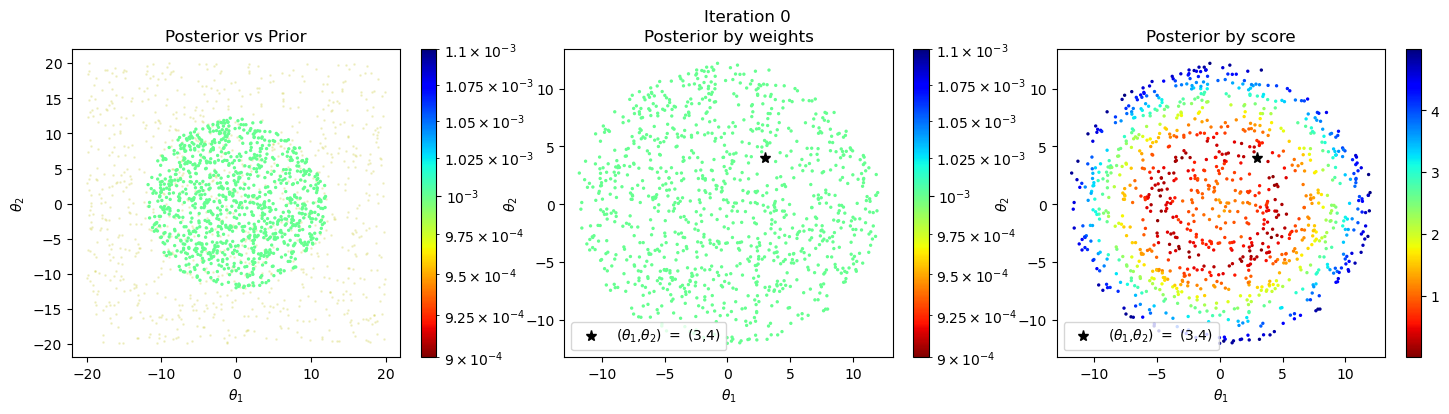

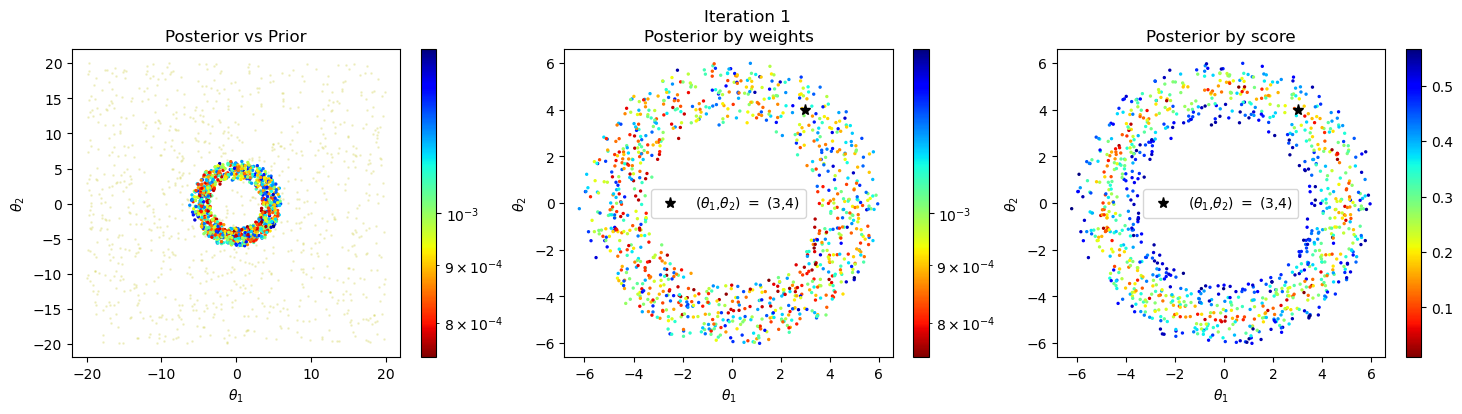

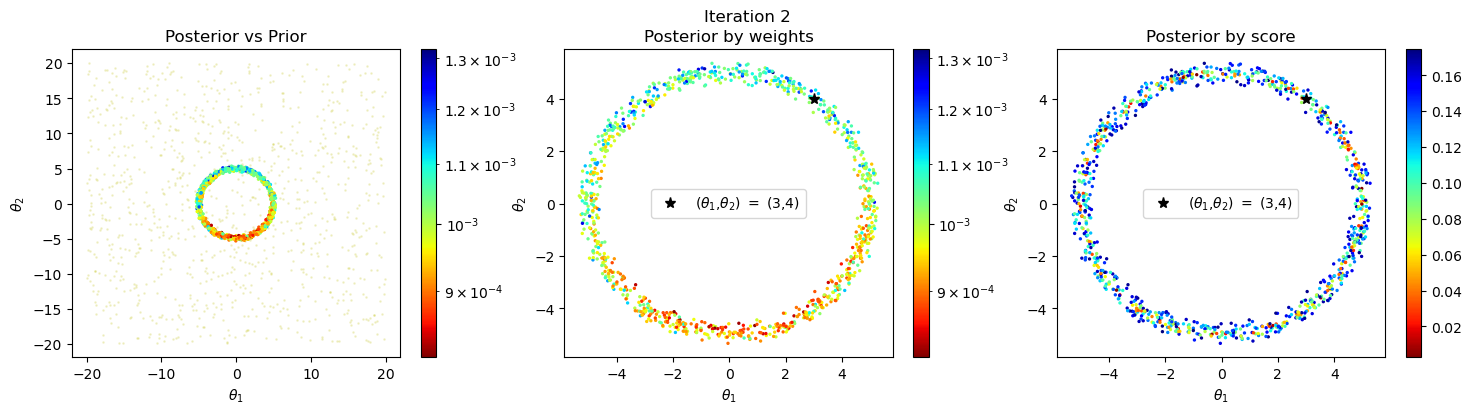

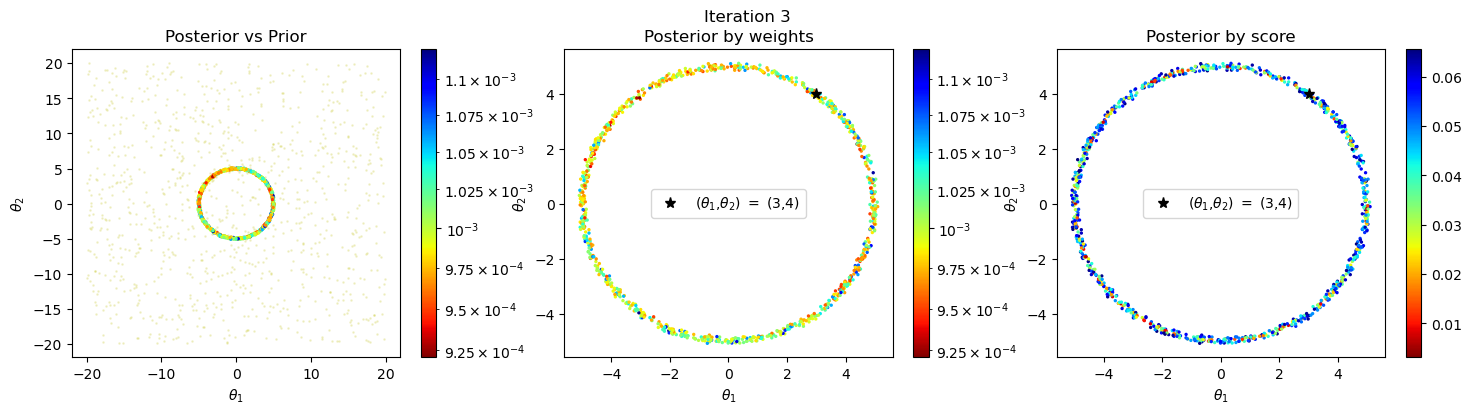

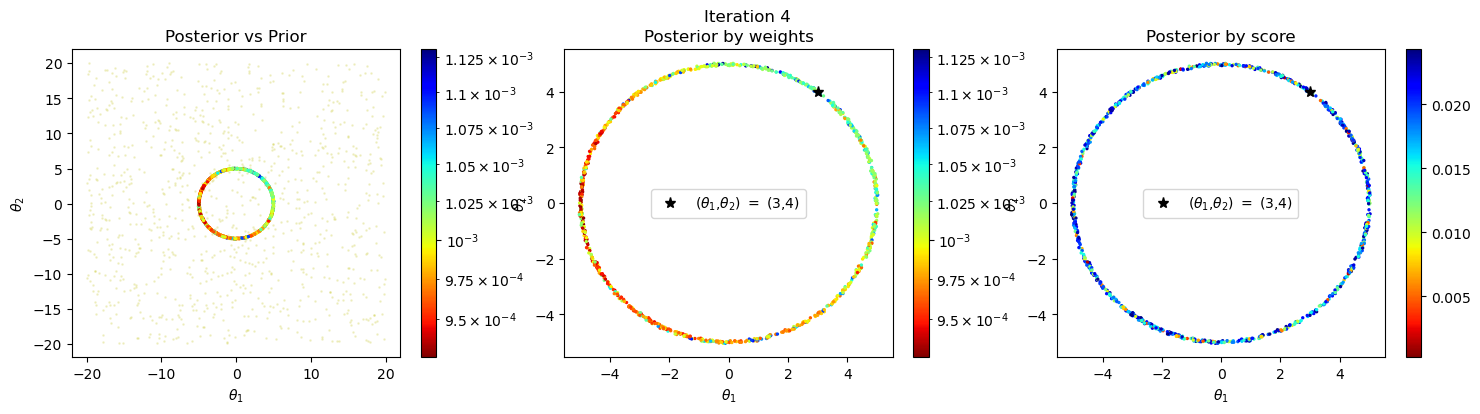

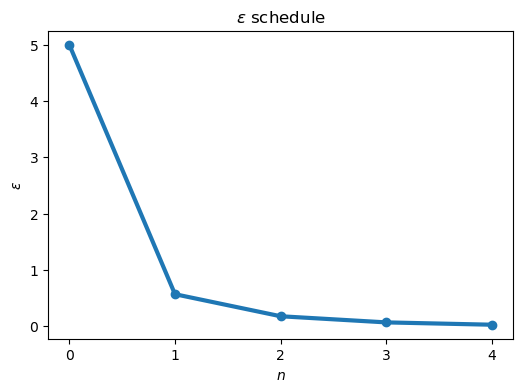

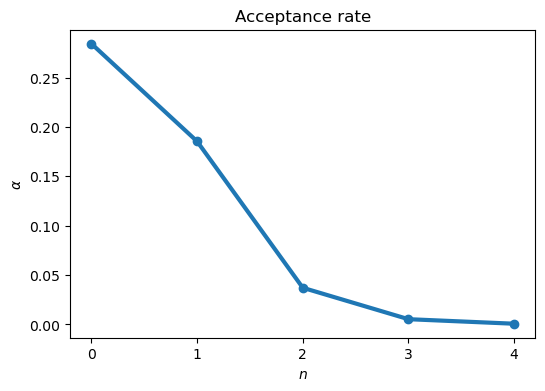

In [24]:
plot_results(
    particle_history, weight_history, score_history, acceptance_rates,
    epsilon_history, prior_list, 
    pname1=pname1, pname2=pname2,
    true_param=true_params,
    save=True, imgdir=imgdir
)

## Perturbations

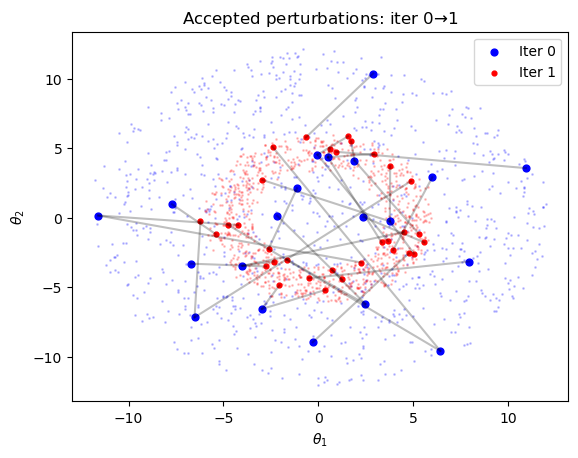

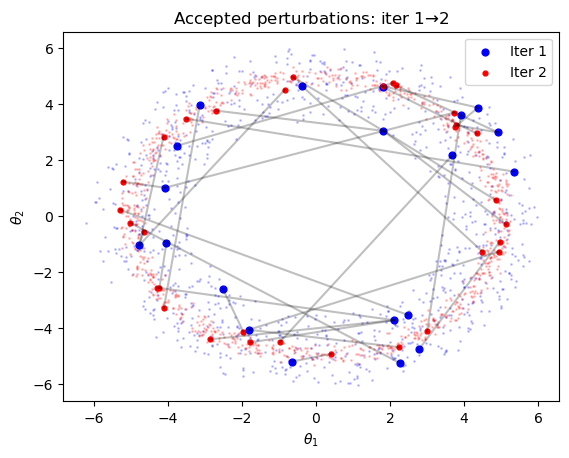

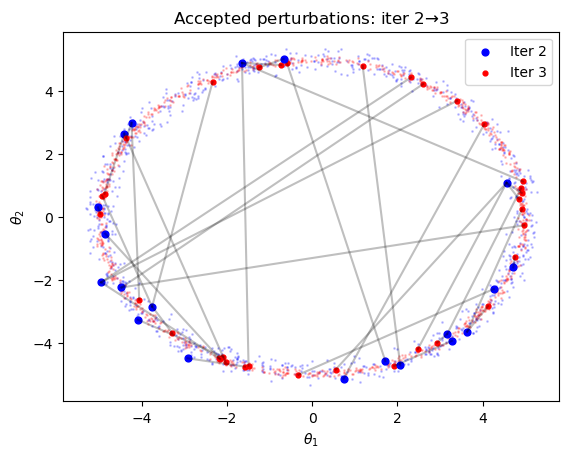

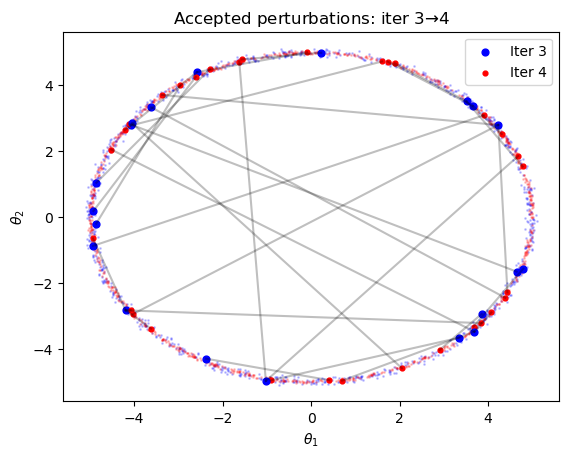

In [25]:
N_PERTRUB_SAMP = 20
for iteridx in range(len(particle_history) - 1):
    plot_perturbation_sample(
        iteridx, particle_history, sampling_idx_history, particle_idx_history, 
        nsamp=N_PERTRUB_SAMP, 
        pname1=pname1, pname2=pname2,
        imgdir=imgdir, 
        saveas=f"perturbation_{iteridx}_{iteridx+1}.png"
    )

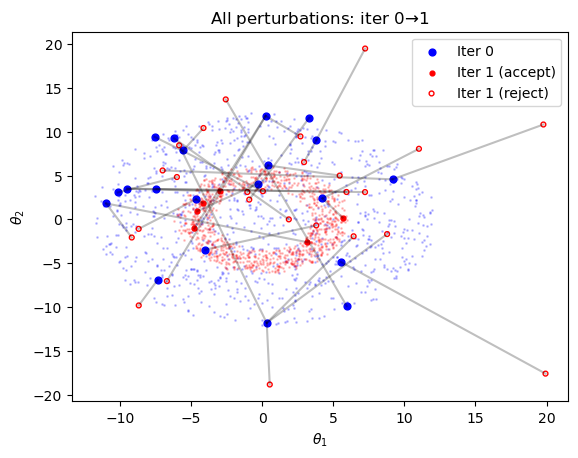

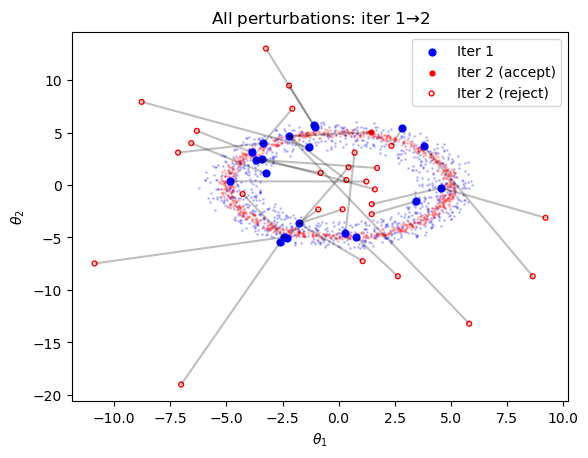

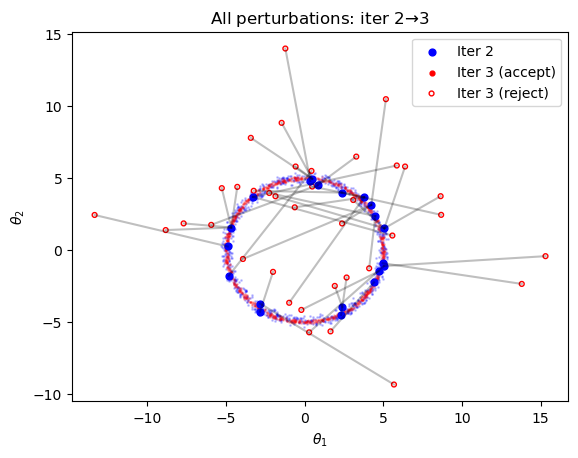

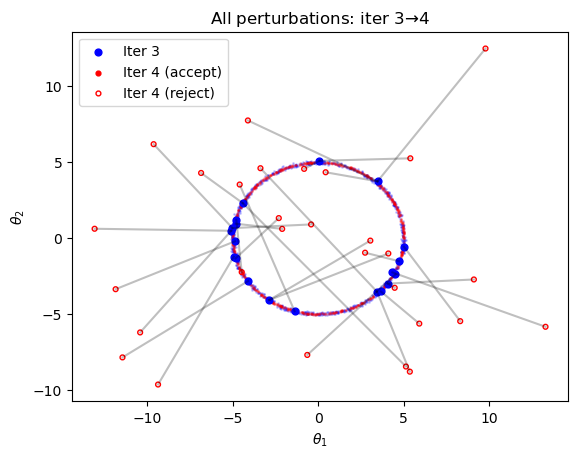

In [26]:
N_PERTRUB_SAMP = 20

for iteridx in range(len(particle_history) - 1):
    plot_all_perturbation_sample(
        iteridx, particle_history, sampling_idx_history, particle_idx_history, 
        all_particle_history, all_sampling_idx_history, 
        acceptance_history=all_particle_acceptance_history,
        nsamp=N_PERTRUB_SAMP, 
        pname1=pname1, pname2=pname2,
        imgdir=imgdir, 
        saveas=f"perturbation_{iteridx}_{iteridx+1}.png"
    )